## 競賽目標
* 從sensor偵測的訊號之中判斷四種異常狀況:Outlier、Baseline_change、Fluctuation、Trend，若無異常狀況則為Normal，異常可能不止一種，部分包含兩種以上，此外模型需抓出異常的起始時間，Trend需多抓結束時間

## 資料描述
* 訓練訊號共317筆，異常狀況統計如下表

| Normal | Outlier |Baseline_change | Fluctuation | Trend |
| -------- | -------- | -------- |-|-|
| 237  | 25 | 21 | 16 | 28 |

* 每張訊號時間為期一個月，但sensor偵測週期並不一致，短則每1分鐘紀錄一次，最長的每8小時紀錄一次

### 異常狀態視覺化
#### 1.Normal

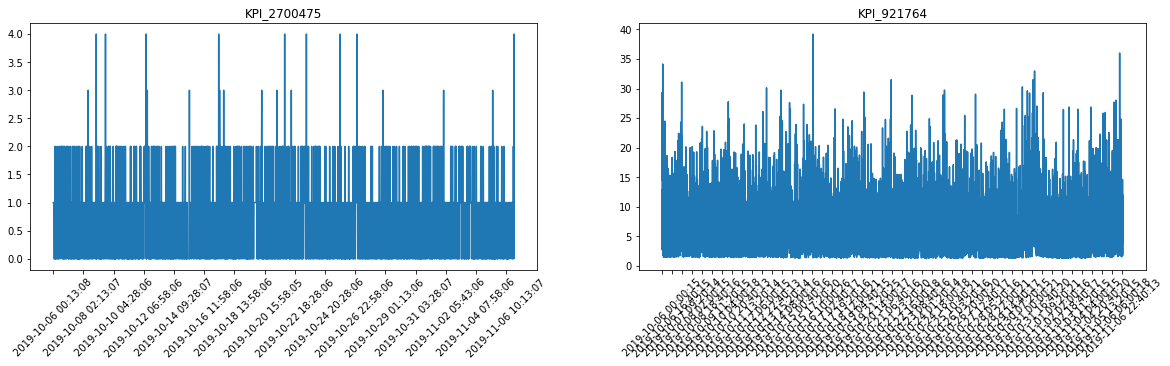

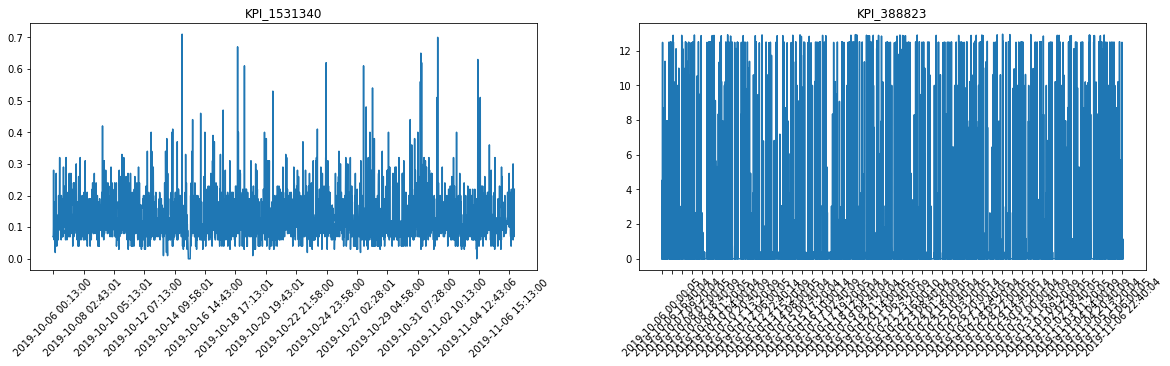

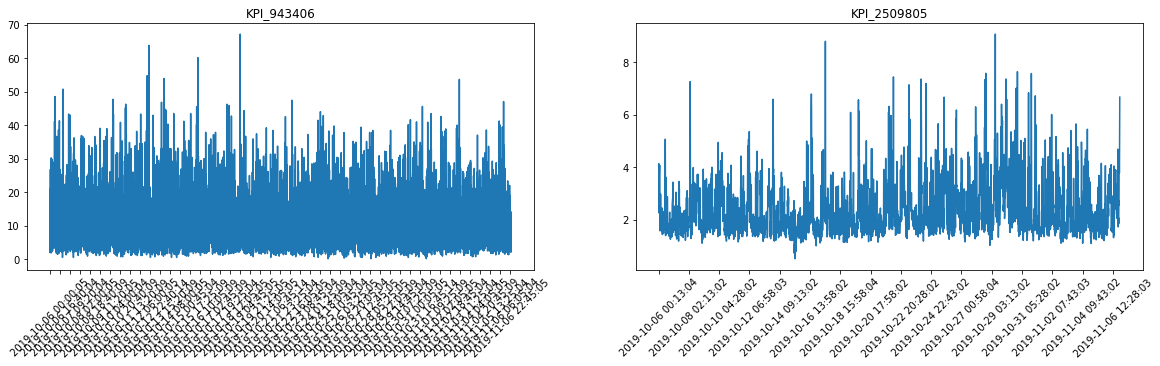

In [9]:
for i in range(1,7,2):
    plt.figure(figsize=(20,10))
    kpi,kpi2 = normal_kpi_ls[i],normal_kpi_ls[i+1]

    plt.subplot(221)
    plot_normal(kpi)
    plt.title(kpi)
    plt.subplot(222)
    plot_normal(kpi2)

#### 2. Outlier
左側為原始訊號，右邊標示出Outlier時間

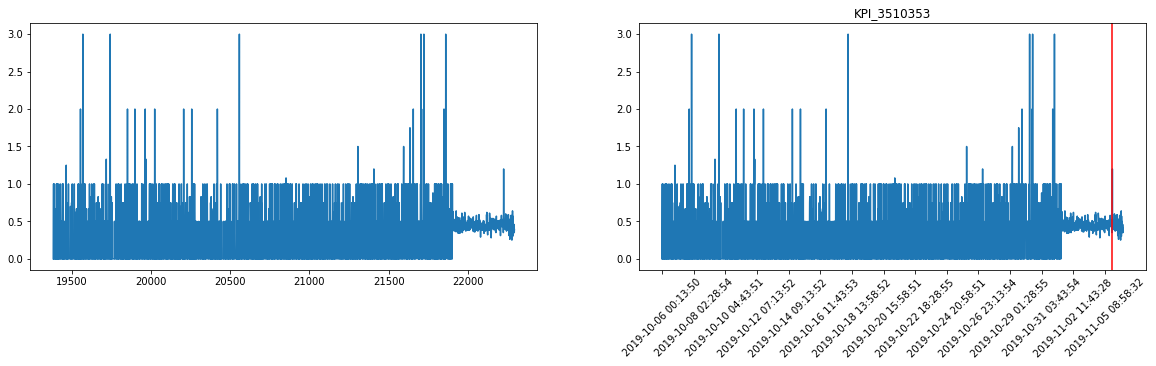

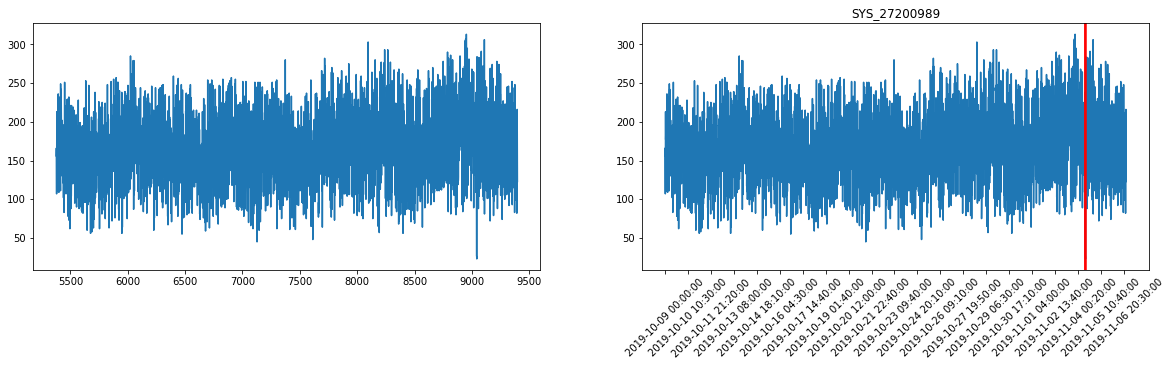

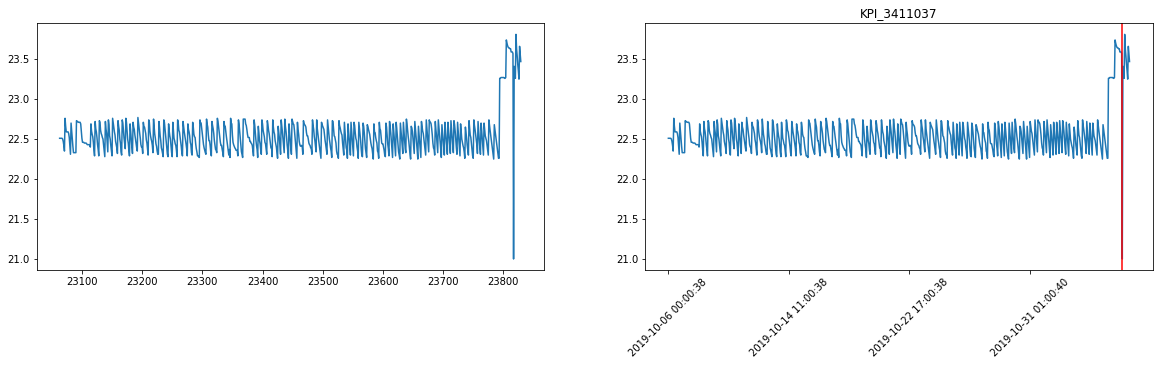

In [10]:
for i in range(1,4):
    plt.figure(figsize=(20,10))
    kpi = outlier_kpi_ls[i]
    plt.subplot(221)
    plt.plot(data[data.NAME==kpi].value)
    
    plt.subplot(222)
    plot_outlier(kpi)

#### 3. Baseline_change


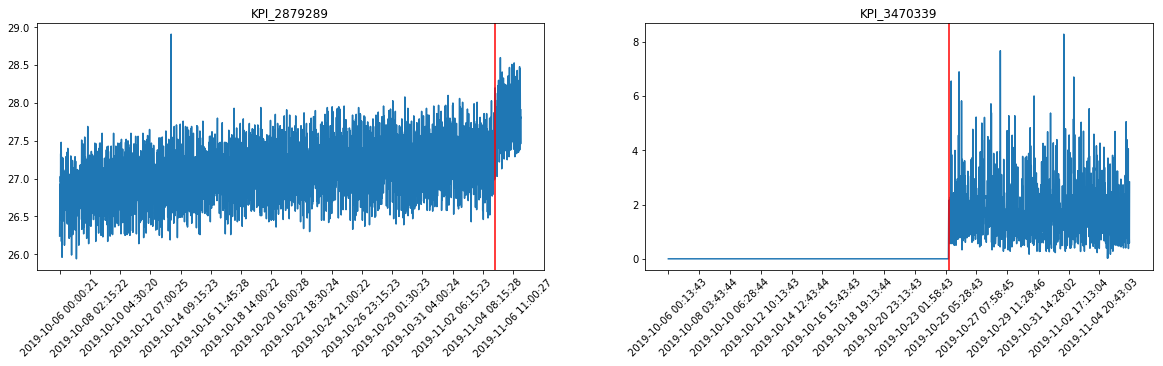

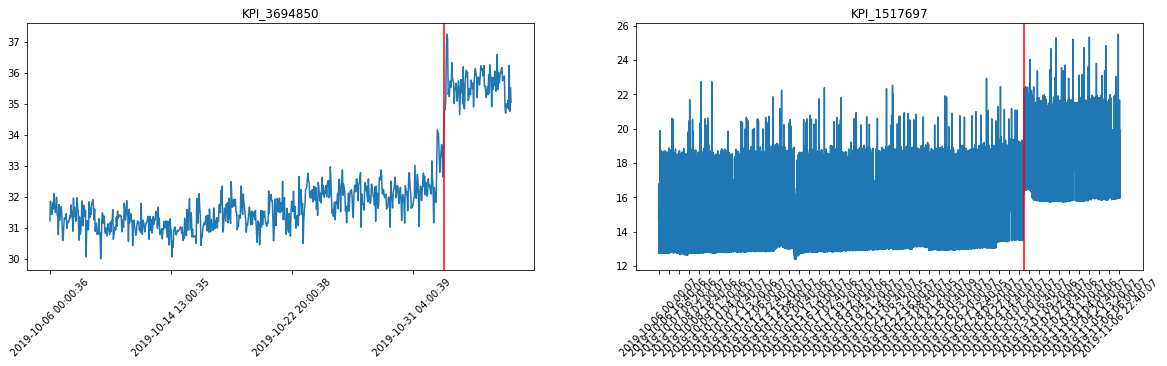

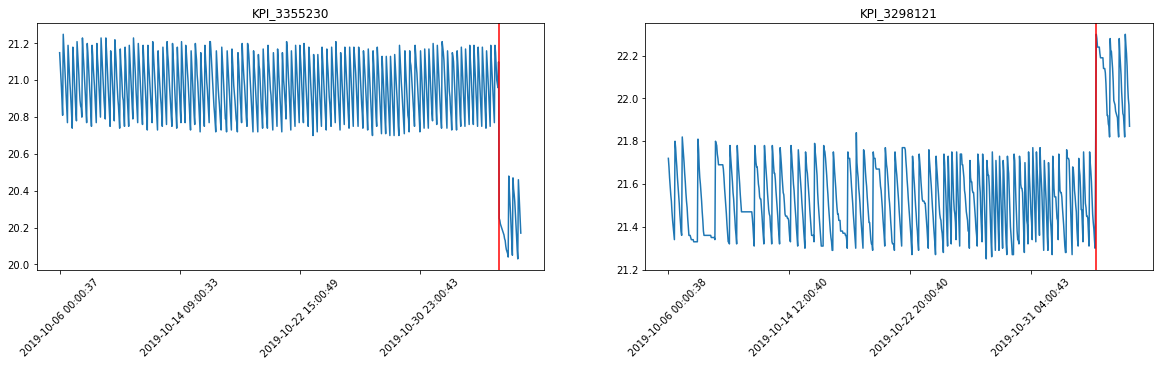

In [11]:
for i in range(1,7,2):
    plt.figure(figsize=(20,10))
    kpi,kpi2 = baseline_change_kpi_ls[i],baseline_change_kpi_ls[i+1]
    plt.subplot(221)
    plot_baseline(kpi)    
    plt.subplot(222)
    plot_baseline(kpi2)

#### 4. Fluctuation

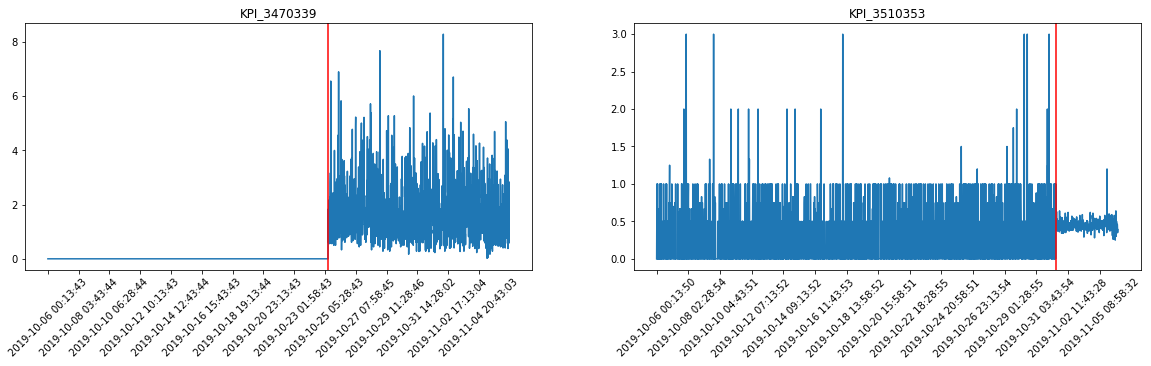

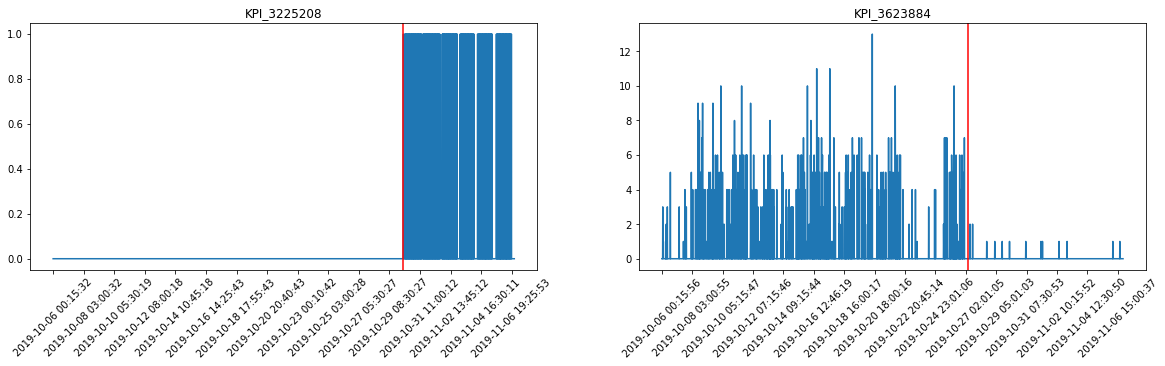

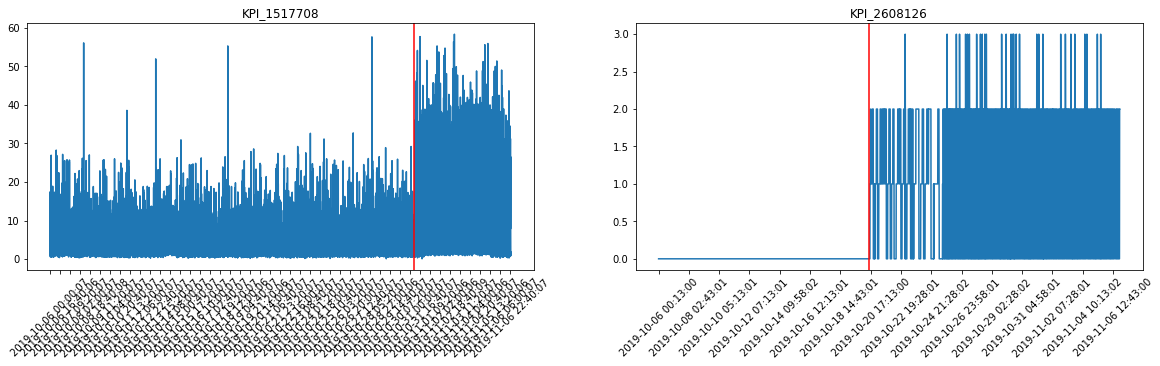

In [12]:
for i in range(1,7,2):
    plt.figure(figsize=(20,10))
    kpi,kpi2 = fluctuation_kpi_ls[i],fluctuation_kpi_ls[i+1]
    plt.subplot(221)
    plot_fluctuation(kpi)    
    plt.subplot(222)
    plot_fluctuation(kpi2)

#### 5. Trend

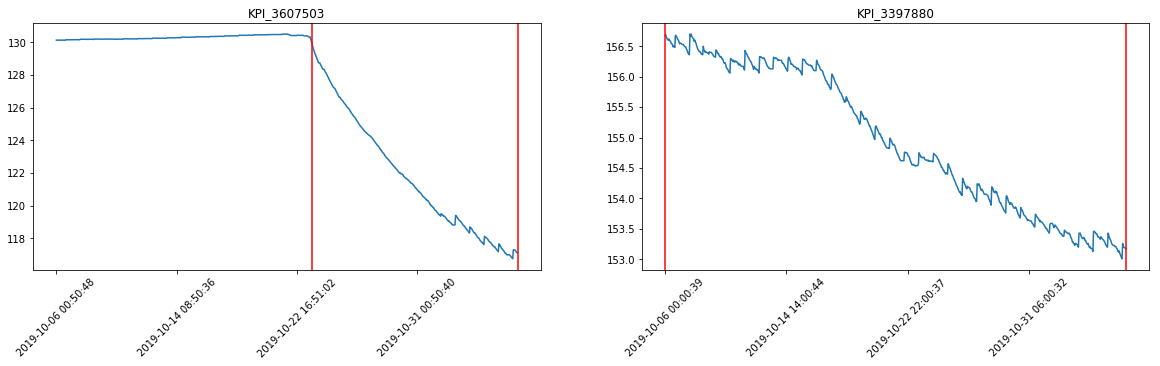

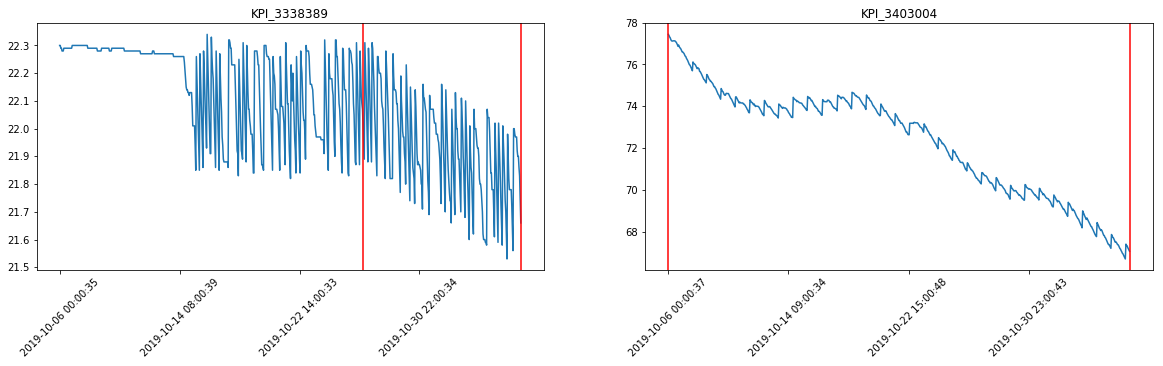

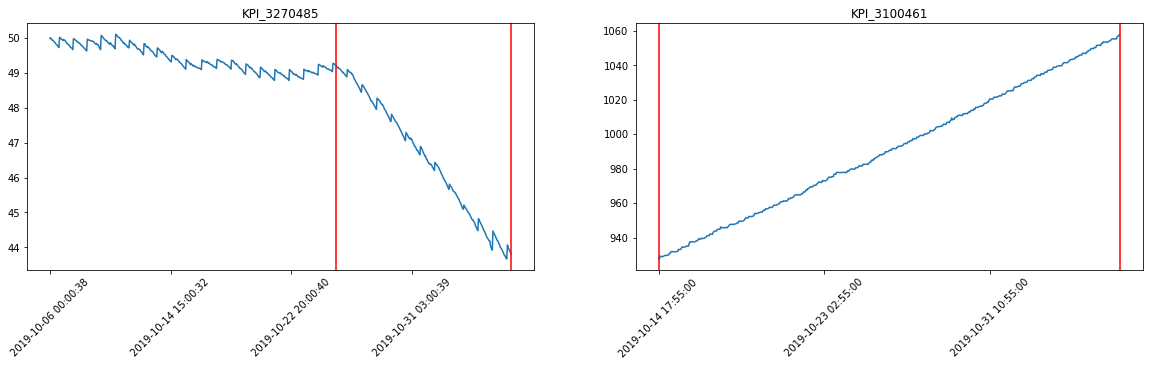

In [13]:
for i in [7,17,22]:
    plt.figure(figsize=(20,10))
    kpi,kpi2 = trend_kpi_ls[i],trend_kpi_ls[i+1]

    plt.subplot(221)
    plot_trend(kpi)    
    plt.subplot(222)
    plot_trend(kpi2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random
from collections import defaultdict

In [2]:
data = pd.read_csv('D://Desmond/Match/Careerhack/anomaly_detection/dataset/train_data.csv')
result_df = pd.read_csv('D://Desmond/Match/Careerhack/anomaly_detection/dataset/train_output_format_true_ans.csv')
result_df.head() 
# normal : 237
# Outlier : 25 
# Baseline_change : 21
# Fluctuation : 16
# Trend : 28

,NAME,Normal,Outlier,Baseline_change,Fluctuation,Trend,Outlier_time,Baseline_time,Fluctuation_time,Trend_status,Trend_start,Trend_end
0,KPI_3585603,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,KPI_2700475,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,KPI_3461124,0,0,0,0,1,NaN,NaN,NaN,down,2019-10-06 00:00:38,2019-11-06 23:01:30
3,KPI_921764,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,KPI_1531340,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
kpi_ls = result_df.NAME.unique()
normal_kpi_ls = result_df[result_df.Normal==1].NAME.tolist()
baseline_change_kpi_ls = [i for i in result_df[result_df.Baseline_change == 1].NAME]
fluctuation_kpi_ls = [i for i in result_df[result_df.Fluctuation == 1].NAME]
outlier_kpi_ls = result_df[result_df.Outlier==1].NAME.tolist()
trend_kpi_ls = result_df[result_df.Trend==1].NAME.tolist()



In [4]:
def plot_baseline(kpi):
    idx_ls=[]
    label_ls=[]
    
    temp_df = data[data.NAME == kpi]   
#     plt.figure(figsize=(20,10))
    x = range(len(temp_df))
    plt.plot(x,temp_df['value'])
    
    for i in range(len(temp_df)):
        if i%200==0:
            idx_ls.append(i)
            label_ls.append(temp_df['time'].iloc[i])
    plt.xticks(idx_ls,label_ls,rotation=45)
   
    
    try:
        change_time = result_df[result_df.NAME==kpi].Baseline_time.iloc[0]
        idx = np.where(temp_df.time == change_time)[0][0]
        plt.axvline(idx,color='r')

    except:
        change_time_ls = result_df[result_df.NAME==kpi].Baseline_time.iloc[0].split(';')
    
        for t in change_time_ls:
            idx = np.where(temp_df.time == t)[0][0]
            plt.axvline(idx,color='r')
        
    
    plt.title(kpi)


In [5]:
def plot_fluctuation(kpi):
    idx_ls=[]
    label_ls=[]
    
    temp_df = data[data.NAME == kpi]   
#     plt.figure(figsize=(20,10))
    x = range(len(temp_df))
    plt.plot(x,temp_df['value'])
    
    for i in range(len(temp_df)):
        if i%200==0:
            idx_ls.append(i)
            label_ls.append(temp_df['time'].iloc[i])
    plt.xticks(idx_ls,label_ls,rotation=45)
    
    
    try:
        change_time = result_df[result_df.NAME==kpi].Fluctuation_time.iloc[0]
        idx = np.where(temp_df.time == change_time)[0][0]
        plt.axvline(idx,color='r')

    except:
        change_time_ls = result_df[result_df.NAME==kpi].Fluctuation_time.iloc[0].split(';')
    
        for t in change_time_ls:
            idx = np.where(temp_df.time == t)[0][0]
            plt.axvline(idx,color='r')
        
    
    plt.title(kpi)


In [6]:
def plot_outlier(kpi):
    idx_ls=[]
    label_ls=[]
    
    temp_df = data[data.NAME == kpi]   
#     plt.figure(figsize=(20,10))
    x = range(len(temp_df))
    plt.plot(x,temp_df['value'])
    
    for i in range(len(temp_df)):
        if i%200==0:
            idx_ls.append(i)
            label_ls.append(temp_df['time'].iloc[i])
    plt.xticks(idx_ls,label_ls,rotation=45)
    
    
    try:
        change_time = result_df[result_df.NAME==kpi].Outlier_time.iloc[0]
        idx = np.where(temp_df.time == change_time)[0][0]
        plt.axvline(idx,color='r')

    except:
        change_time_ls = result_df[result_df.NAME==kpi].Outlier_time.iloc[0].split(';')
    
        for t in change_time_ls:
            idx = np.where(temp_df.time == t)[0][0]
            plt.axvline(idx,color='r')
        
    
    plt.title(kpi)


In [7]:
def plot_trend(kpi):
    idx_ls=[]
    label_ls=[]
    
    temp_df = data[data.NAME == kpi]   
#     plt.figure(figsize=(20,10))
    x = range(len(temp_df))
    plt.plot(x,temp_df['value'])
    
    for i in range(len(temp_df)):
        if i%200==0:
            idx_ls.append(i)
            label_ls.append(temp_df['time'].iloc[i])
    plt.xticks(idx_ls,label_ls,rotation=45)
    
    
    
    start_time = result_df[result_df.NAME==kpi].Trend_start.iloc[0]
    idx = np.where(temp_df.time == start_time)[0][0]
    plt.axvline(idx,color='r')

    end_time = result_df[result_df.NAME==kpi].Trend_end.iloc[0]
    idx = np.where(temp_df.time == end_time)[0][0]
    plt.axvline(idx,color='r')

        
    
    plt.title(kpi)


In [8]:
def plot_normal(kpi):
    idx_ls=[]
    label_ls=[]
    
    temp_df = data[data.NAME == kpi]   
#     plt.figure(figsize=(20,10))
    x = range(len(temp_df))
    plt.plot(x,temp_df['value'])
    
    for i in range(len(temp_df)):
        if i%200==0:
            idx_ls.append(i)
            label_ls.append(temp_df['time'].iloc[i])
    plt.xticks(idx_ls,label_ls,rotation=45)
    
    plt.title(kpi)
